In [2]:
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mex=pd.read_csv('train_MEX.csv')
mex

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,...,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT,test
0,400338,484.0,MEX,48400001.0,48400094.0,07MS,48400,MEX0007,4840000,1.0,...,475.279,488.079,524.244,511.012,537.104,498.937,549.383,0.54995,03JUN19:15:48:59,NaN
1,400339,484.0,MEX,48400001.0,48401003.0,07MS,48400,MEX0007,4840000,1.0,...,551.850,461.989,519.769,532.281,509.240,540.905,516.686,0.54995,03JUN19:15:48:59,NaN
2,400340,484.0,MEX,48400001.0,48401122.0,07MS,48400,MEX0007,4840000,1.0,...,463.240,483.787,510.713,482.536,473.679,459.502,523.584,0.51334,03JUN19:15:48:59,NaN
3,400341,484.0,MEX,48400001.0,48401527.0,07MS,48400,MEX0007,4840000,1.0,...,363.714,349.697,345.934,356.641,361.181,286.888,340.645,0.51334,03JUN19:15:48:59,NaN
4,400342,484.0,MEX,48400001.0,48401706.0,07MS,48400,MEX0007,4840000,1.0,...,502.633,489.794,506.437,489.153,490.855,444.564,470.792,0.51334,03JUN19:15:48:59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7294,407632,484.0,MEX,48400293.0,48407512.0,07MS,48400,MEX0007,4840000,1.0,...,434.625,382.371,413.819,438.604,453.548,429.528,429.990,0.54242,03JUN19:15:48:59,NaN
7295,407633,484.0,MEX,48400293.0,48407765.0,07MS,48400,MEX0007,4840000,1.0,...,459.892,464.373,499.802,437.965,494.874,514.069,465.142,0.54242,03JUN19:15:48:59,NaN
7296,407634,484.0,MEX,48400293.0,48407820.0,07MS,48400,MEX0007,4840000,1.0,...,476.537,486.447,403.784,485.745,464.752,444.753,448.178,0.54242,03JUN19:15:48:59,NaN
7297,407635,484.0,MEX,48400293.0,48408112.0,07MS,48400,MEX0007,4840000,1.0,...,467.321,398.788,431.267,501.668,454.833,439.184,454.633,0.54242,03JUN19:15:48:59,NaN


In [4]:
escs_name=["HISEI","PARED","HOMEPOS"]
escs=mex[escs_name]
escs

,HISEI,PARED,HOMEPOS
0,57.64,12.0,-1.8528
1,17.00,12.0,-0.3838
2,26.62,12.0,-1.0542
3,NaN,16.0,-1.2651
4,27.91,9.0,-1.1340
...,...,...,...
7294,44.14,14.0,-0.6707
7295,40.54,14.0,-2.5328
7296,30.34,9.0,-3.0467
7297,17.00,6.0,-2.3892


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


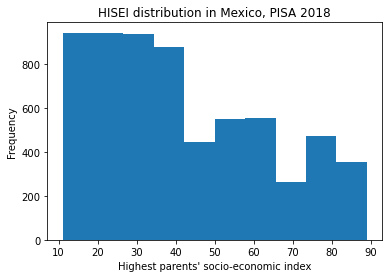

In [40]:
plt.hist(escs['HISEI'])
plt.xlabel("Highest parents' socio-economic index")
plt.ylabel("Frequency")
plt.title("HISEI distribution in Mexico, PISA 2018")
plt.savefig('HISEI mex.jpg')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


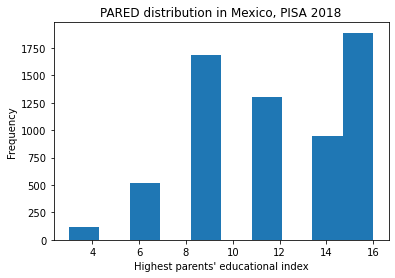

In [5]:
plt.hist(escs['PARED'])
plt.xlabel("Highest parents' educational index")
plt.ylabel("Frequency")
plt.title("PARED distribution in Mexico, PISA 2018")
plt.savefig('par mex.jpg')
plt.show()

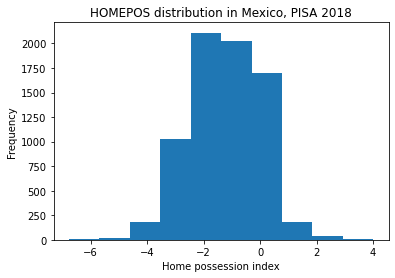

In [45]:
plt.hist(escs['HOMEPOS'])
plt.xlabel("Home possession index")
plt.ylabel("Frequency")
plt.title("HOMEPOS distribution in Mexico, PISA 2018")
plt.savefig('home mex.jpg')
plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix

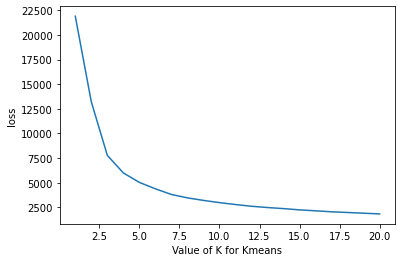

In [41]:
#escs=escs.dropna(axis = 0)
escs=escs.fillna(0)
X = escs.values.tolist()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
summary_3d = pca.fit_transform(X_scaled)

#figure with normalization
k_range = range(1, 21)
loss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled) 
    loss.append(kmeans.inertia_)
    
plt.plot(k_range, loss)    
plt.xlabel('Value of K for Kmeans')
plt.ylabel('loss')
plt.show()

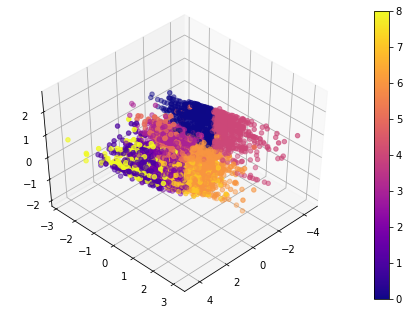

In [33]:
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns


kmeans = KMeans(n_clusters = 9)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

fig = plt.figure()
ax = Axes3D(fig)
g = ax.scatter(summary_3d[:,0], summary_3d[:,1], summary_3d[:,2], c = clusters, cmap = 'plasma')
plt.colorbar(g, ax = ax)
ax.view_init(azim = 45, elev = 45)


In [20]:
escs['cluster'] = clusters

<ipython-input-20-fe982a3c0cbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escs['cluster'] = clusters


In [22]:
escs['cluster'] = escs['cluster'].replace([0,3,4,5,8,2,7,6,1],[0,1,2,3,4,5,6,7,8])

<ipython-input-22-67acf025227e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escs['cluster'] = escs['cluster'].replace([0,3,4,5,8,2,7,6,1],[0,1,2,3,4,5,6,7,8])


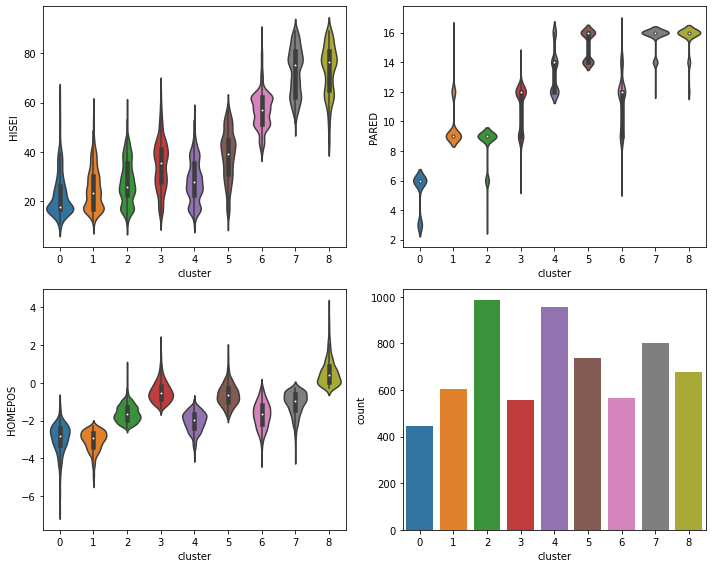

In [23]:
fig, axes = plt.subplots(2,2, figsize = (10,8))

sns.violinplot(data = escs, x = 'cluster', y = 'HISEI', ax = axes[0][0])
sns.violinplot(data = escs, x = 'cluster', y = 'PARED', ax = axes[0][1])
sns.violinplot(data = escs, x = 'cluster', y = 'HOMEPOS', ax = axes[1][0])
sns.countplot(data = escs, x = 'cluster', ax = axes[1][1])

plt.tight_layout()

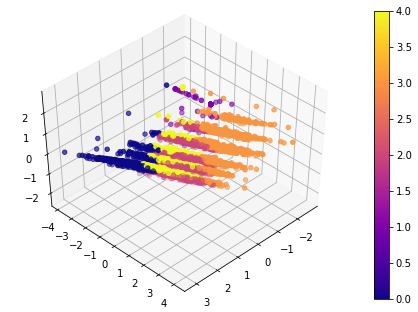

In [42]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

fig = plt.figure()
ax = Axes3D(fig)
g = ax.scatter(summary_3d[:,0], summary_3d[:,1], summary_3d[:,2], c = clusters, cmap = 'plasma')
plt.colorbar(g, ax = ax)
ax.view_init(azim = 45, elev = 45)

In [43]:
escs['cluster'] = clusters

In [27]:
escs['cluster'] = escs['cluster'].replace([2,0,4,1,3],[0,1,2,3,4])

<ipython-input-27-613d98661e3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escs['cluster'] = escs['cluster'].replace([2,0,4,1,3],[0,1,2,3,4])


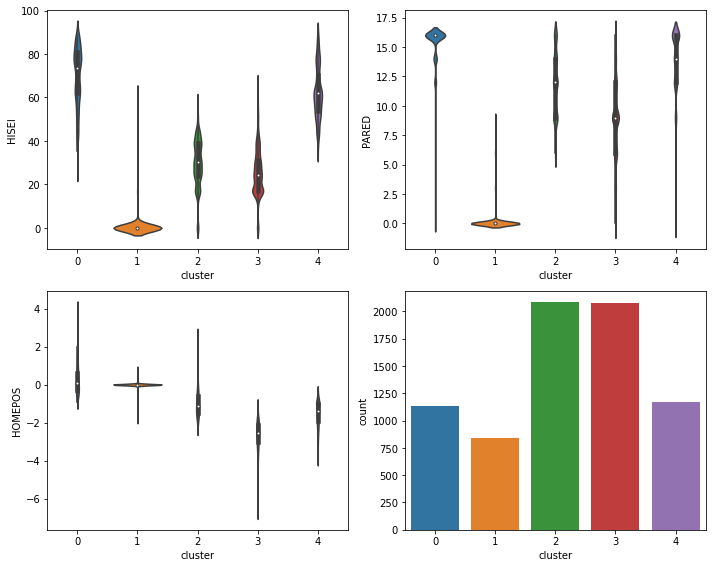

In [44]:
fig, axes = plt.subplots(2,2, figsize = (10,8))

sns.violinplot(data = escs, x = 'cluster', y = 'HISEI', ax = axes[0][0])
sns.violinplot(data = escs, x = 'cluster', y = 'PARED', ax = axes[0][1])
sns.violinplot(data = escs, x = 'cluster', y = 'HOMEPOS', ax = axes[1][0])
sns.countplot(data = escs, x = 'cluster', ax = axes[1][1])

plt.tight_layout()